# US medical insurance costs

In this project, we will compare the medical insurance charges and see which elements contribue to higher charges.
1. Are the different age groups equally represented in the database?
2. Does the region affect the insurance charges? 
3. Is there a difference in charges between males and females?
4. How does smoking influence the medical insurance charges?
5. How does BMI influence the medical insurance charges? 



In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
insurance = pd.read_csv('insurance.csv')

In [6]:
# GENERAL INFORMATION ON THE DATABASE
print(insurance.head())
print(insurance.describe())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


           bmi  children       charges
age                                   
18   31.326159  0.449275   7086.217556
19   28.596912  0.426471   9747.909335
20   30.632759  0.862069  10159.697736
21   28.185714  0.785714   4730.464330
22   31.087679  0.714286  10012.932802
23   31.454464  1.000000  12419.820040
24   29.142679  0.464286  10648.015962
25   29.693929  1.285714   9838.365311
26   29.428929  1.071429   6133.825309
27   29.333571  0.964286  12184.701721
28   29.482143  1.285714   9069.187564
29   29.383148  1.259259  10430.158727
30   30.557593  1.555556  12719.110358
31   29.918333  1.407407  10196.980573
32   31.597692  1.269231   9220.300291
33   31.163077  1.538462  12351.532987
34   30.274038  1.153846  11613.528121
35   31.394800  1.680000  11307.182031
36   29.374200  1.240000  12204.476138
37   31.216600  1.520000  18019.911877
38   28.996600  1.480000   8102.733674
39   29.910200  2.200000  11778.242945
40   30.139074  1.592593  11772.251310
41   31.506852  1.407407 

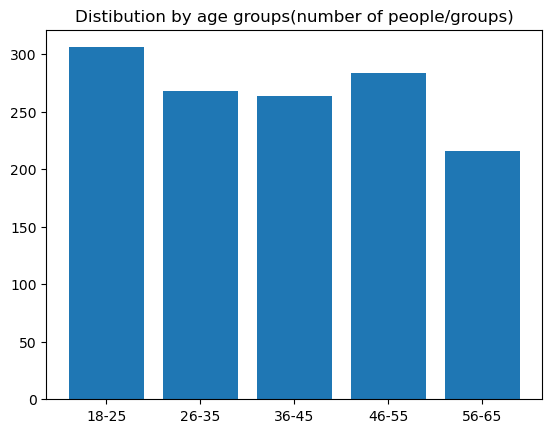

In [16]:
# 1. age categories
def age_groups(insurance): 
    groups = [0,0,0,0,0]
    for age in insurance['age']:
        if age <=25:
            groups[0]+=1
        elif age<=35:
            groups[1]+=1
        elif age<=45:
            groups[2]+=1
        elif age<=55:
            groups[3]+=1
        else:
            groups[4]+=1
    return [group for group in groups]
groups = ['18-25','26-35','36-45','46-55','56-65']
plt.title('Distibution by age groups(number of people/groups)')
plt.bar(groups,age_groups(insurance))

avg_age = insurance.groupby('age').mean()
print(avg_age)
print("The age distribution is equal") 


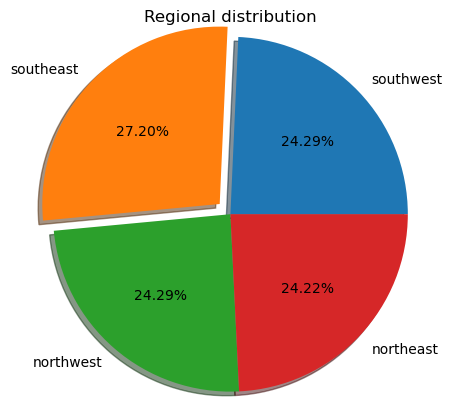

The regional distribution is almost equal
                 age        bmi  children       charges
region                                                 
northeast  39.268519  29.173503  1.046296  13406.384516
northwest  39.196923  29.199785  1.147692  12417.575374
southeast  38.939560  33.355989  1.049451  14735.411438
southwest  39.455385  30.596615  1.141538  12346.937377
The charges are however different in each region: people in the Southeast pay the most charges, with an average of 14735. In this region, people also have a higher BMI (33 instead of +/- 30 in other regions). People from the northeast pay on average 13406 in charges. In the northwest and southwest people pay proximatly 12400 in medical charges. 


In [12]:
# 2. Regional distribution
def region_distr(insurance):
    regions=[0,0,0,0]
    for region in insurance['region']:
        if region == 'southwest':
            regions[0]+=1
        if region == 'southeast':
            regions[1]+=1
        if region == 'northwest':
            regions[2]+=1
        if region == 'northeast':
            regions[3]+=1
    return [round(regions[i]*100/sum(regions),2) for i in range(len(regions))]
region_names = ["southwest","southeast","northwest","northeast"]
plt.title('Regional distribution')
plt.pie(region_distr(insurance), autopct='%.2f%%', radius = 1.2,
    explode = (0,0.1,0,0),shadow=True,labels=region_names)
plt.show()
print("The regional distribution is almost equal")
region_avg = insurance.groupby("region").mean()
print(region_avg)
print("The charges are however different in each region: people in the Southeast pay the most charges, with an average of 14735. In this region, people also have a higher BMI (33 instead of +/- 30 in other regions). People from the northeast pay on average 13406 in charges. In the northwest and southwest people pay proximatly 12400 in medical charges. ") 

In [17]:
# 3. balance male/female
female = insurance[insurance["sex"] == "female"]
percentage_woman = len(female)/len(insurance) * 100
print(percentage_woman)
percentage_men = 100 - percentage_woman
print(percentage_men)
gender_avg_all = insurance.groupby("sex").mean()
print(gender_avg_all)

print("There is a difference in insurance costs between man and woman: on average, the charges of males are almost 1.500 $ higher, while age, bmi and children are almost equal")

49.47683109118087
50.52316890881913
              age        bmi  children       charges
sex                                                 
female  39.503021  30.377749  1.074018  12569.578844
male    38.917160  30.943129  1.115385  13956.751178
There is a difference in insurance costs between man and woman: on average, the charges of males are almost 1.500 $ higher, while age, bmi and children are almost equal


              age        bmi  children       charges
smoker                                              
no      39.385338  30.651795  1.090226   8434.268298
yes     38.514599  30.708449  1.113139  32050.231832


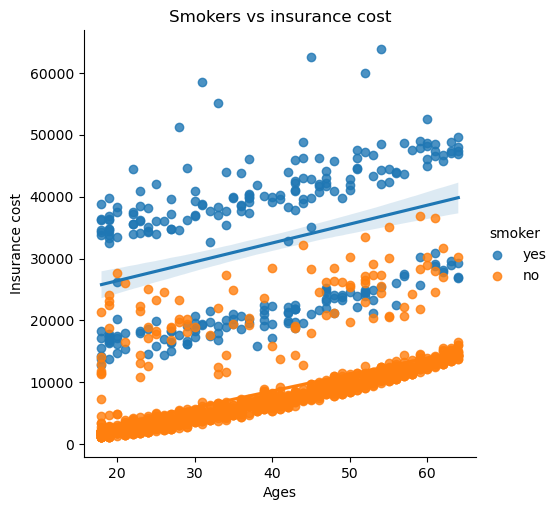

Smoking inluences the medical insurance costs heavily. A smoker pays on average 23.600 $ more in insurance costs than a non-smoker.


In [19]:
# 4. Smoking or not
smokers_av_all =insurance.groupby('smoker').mean()
print(smokers_av_all)
sns.lmplot(x="age", y="charges", hue="smoker", data = insurance)
plt.title('Smokers vs insurance cost')
plt.xlabel('Ages')
plt.ylabel('Insurance cost')
plt.show()
print("Smoking inluences the medical insurance costs heavily. A smoker pays on average 23.600 $ more in insurance costs than a non-smoker.")

              age  children       charges
bmi                                      
15.960  18.000000  0.000000   1694.796400
16.815  29.500000  1.500000   4904.000350
17.195  26.000000  2.000000  14455.644050
17.290  27.666667  1.333333   7813.353433
17.385  23.000000  1.000000   2775.192150
...           ...       ...           ...
48.070  46.000000  2.000000   9432.925300
49.060  58.000000  0.000000  11381.325400
50.380  23.000000  1.000000   2438.055200
52.580  22.000000  1.000000  44501.398200
53.130  18.000000  0.000000   1163.462700

[548 rows x 3 columns]


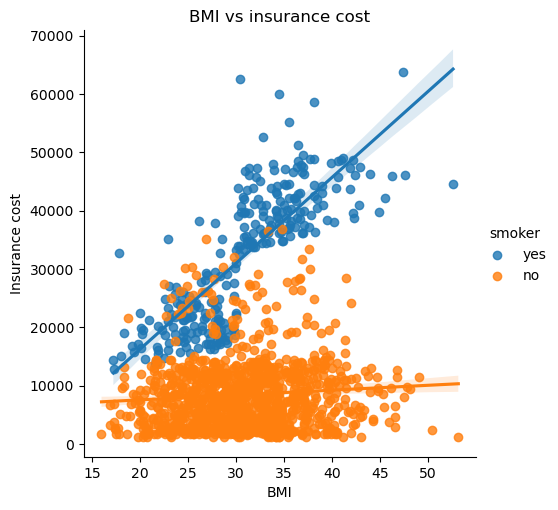

BMI influences the insurance charges, but not as much as smoking does


In [79]:
# 5. BMI
avg_bmi_all = insurance.groupby("bmi").mean()
print(avg_bmi_all)

sns.lmplot(x="bmi", y="charges", hue='smoker', data = insurance)
plt.title('BMI vs insurance cost')
plt.xlabel('BMI')
plt.ylabel('Insurance cost')
plt.show()
print("BMI influences the insurance charges, but not as much as smoking does")

## Answers to the questions
### 1. Are the different age groups equally represented in the database?
The different age groups are equally represented in the database. And even though the charges are variable for each age, we see two points where the medical insurance costs become higher: firstly around 33 where charges don't go below 10.000 anymore and secondly around 60 where charges are close to or over 20.000.

### 2. Does the region affect the insurance charges? 
The different regions are almost equally represented in the database with a slight majority for the southeast region. The charges are however different in each region: people in the Southeast pay the most charges, with an average of 14.735. In this region, people also have a higher BMI (33 instead of +/- 30 in other regions). People from the northeast pay on average 13.406 in charges. In the northwest and southwest people pay proximatly 12.400 in medical charges.

### 3. Is there a difference in charges between males and females?
The medical insurance costs for males are around 14.000, while this is only around 12.500 for females.

### 4. How does smoking influence the medical insurance charges?
The biggest influencer on medical insurance costs is smoking: on average a non-smoker will pay around 8.400 of insurance costs, while a smoker pays around 32.000 of insurance costs. This is an astonishing difference of 23.600.

### 5. How does BMI influence the medical insurance charges? 
BMI influences the insurance charges, but not as much as smoking does.

